In [1]:
import numpy as np
import pandas as pd
import GPy
import time
import sys
import os
import pdb
import matplotlib.pyplot as plt

from context import aep
from context import gpr
from context import load_data
from context import delete_blocks
from context import start_df
from context import save_df
from context import metrics
from thesis_work.plots import GP_figures
from thesis_work.plots import SGP_figures
from thesis_work.plots import DGP_figures

from baseline_models import full_GP_reg
from baseline_models import sparse_GP_reg
from aep_config import cont_optimization
from aep_config import aep_DGP_reg

default_dict = {'M': 30, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':100,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': []}
os.getcwd()
%matplotlib notebook

/Users/sergiopascualdiaz/mlsalt-code/geepee/geepee/


# Load data: normalise, delete blocks

Dataset size:  2500  Test size:  1000.0
Training:  750


<IPython.core.display.Javascript object>


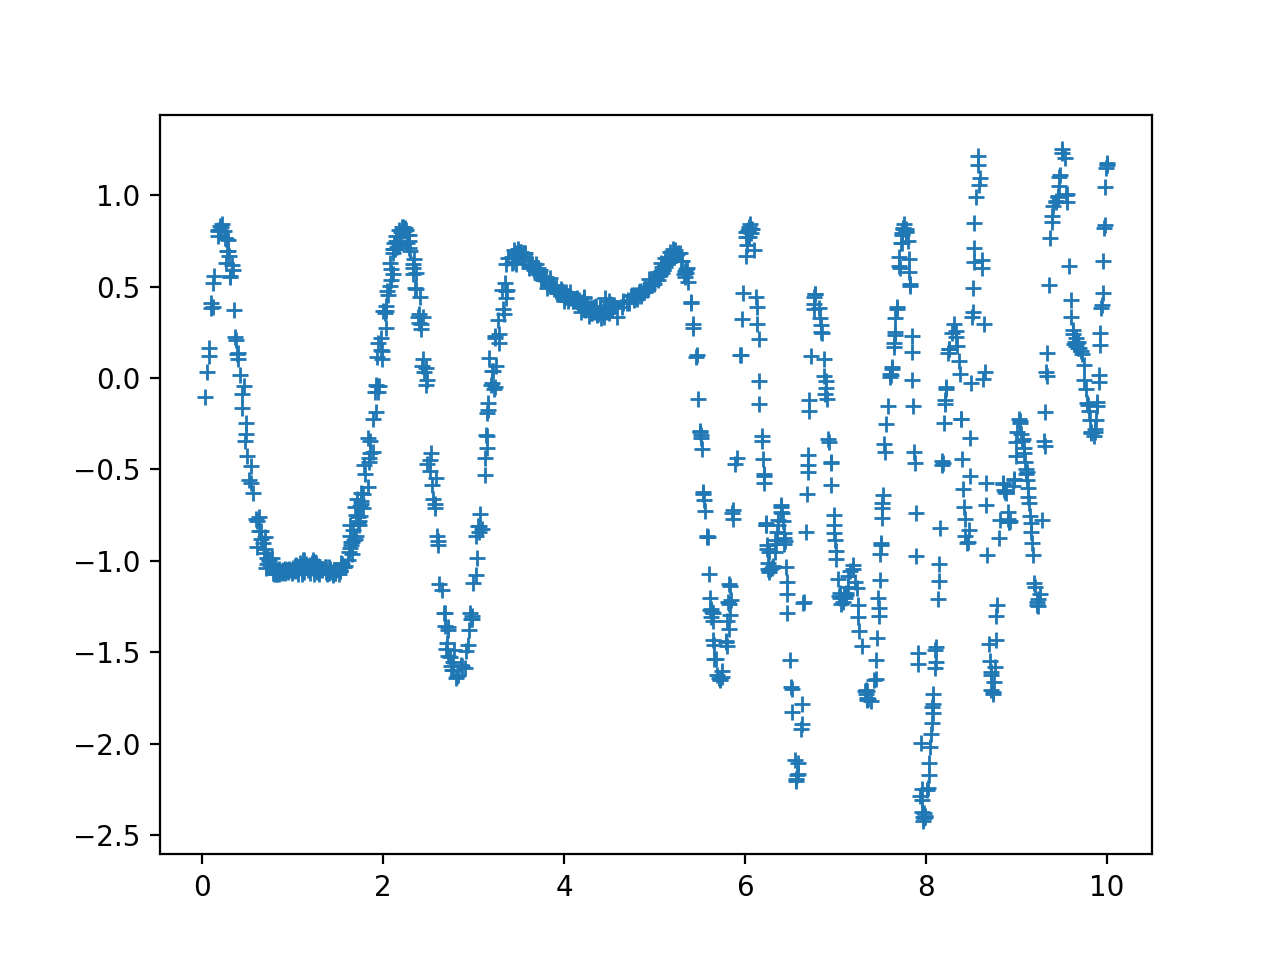

In [2]:
path = 'data/sample_1.txt'
X_train, y_train, X_test, y_test = load_data(path, N_train=750, test=0.4, norm_out=False)
# X_test, y_test = delete_blocks(X_test, y_test,
#                                intervals=[2,4,8,9])
plt.figure()
plt.plot(X_test, y_test, '+')
plt.show()

# Baseline models

create full GP model and optimize ...
Test MSE =0.004, NLL =-1.329


<IPython.core.display.Javascript object>


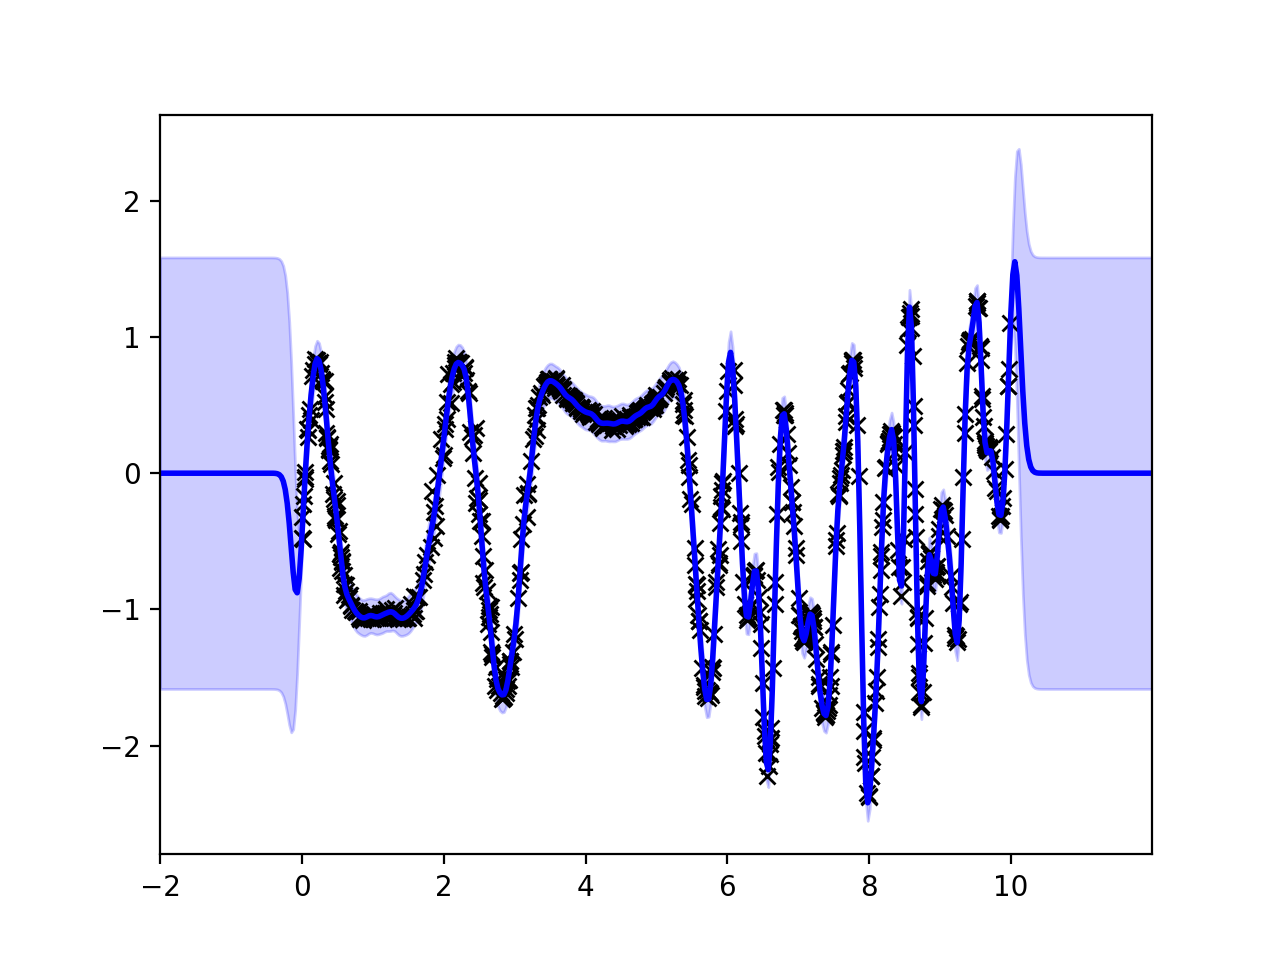

In [3]:
model_gp, df = full_GP_reg(X_train, y_train, X_test, y_test)
fig = GP_figures(model_gp).plot()

In [4]:
# fig.savefig('../fig.png')
# save_df('../', df, name='scores')

## Sparse GP

create SGP model and optimize ...
Test MSE =0.046, NLL =-0.061


<IPython.core.display.Javascript object>


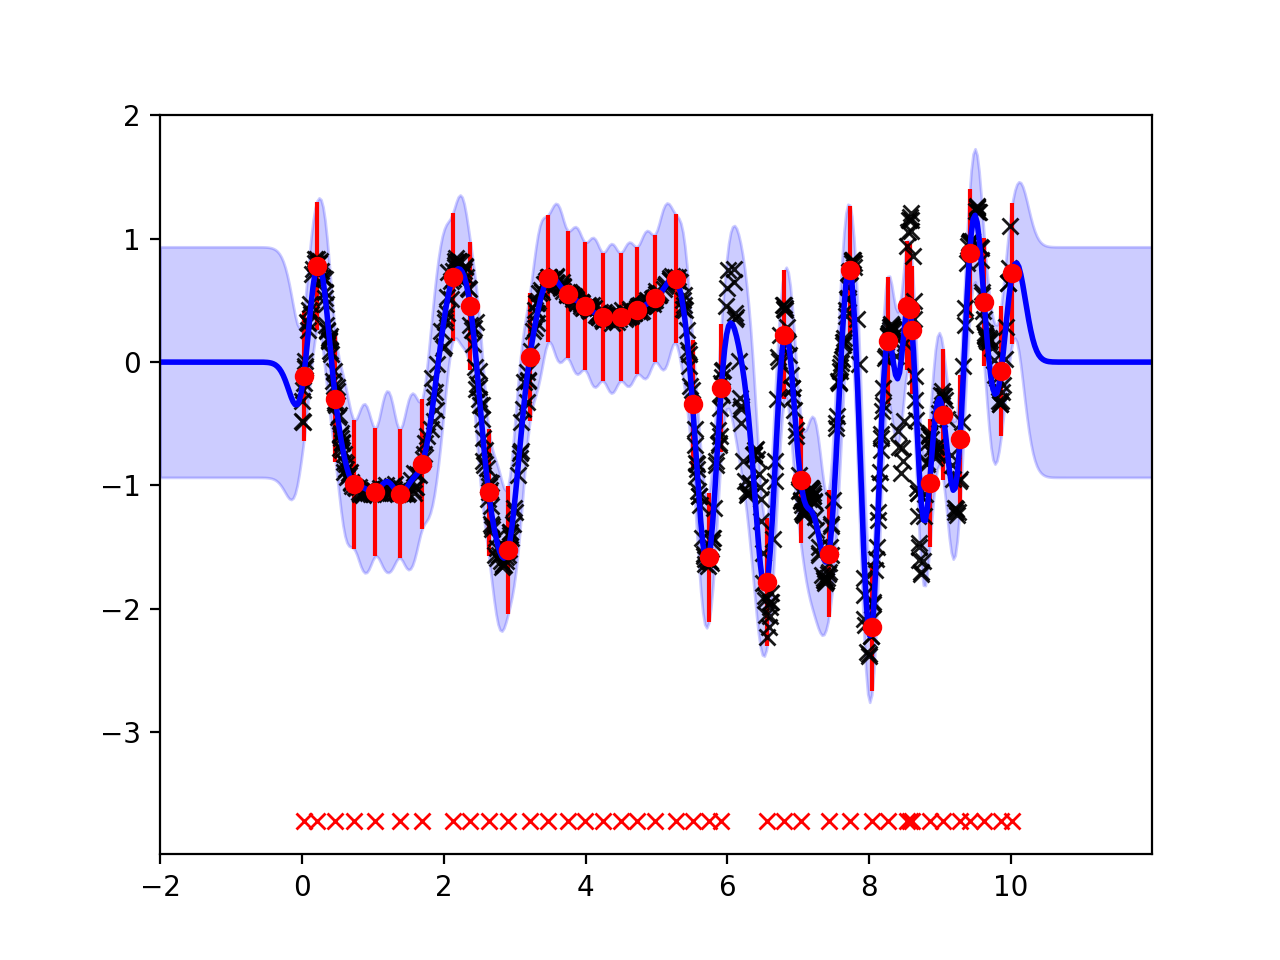

In [5]:
model_sgp, df = sparse_GP_reg(X_train, y_train, X_test, y_test, M=40)
fig = SGP_figures(model_sgp).plot()

# AEP Deep GPs

Create DGP model and optimize ...
Optimise with fixed:  []
iter 0 	 obj 11.980
iter 50 	 obj 4.110
iter 100 	 obj 3.469
iter 150 	 obj 2.799
iter 200 	 obj 2.137
iter 250 	 obj 1.710
iter 300 	 obj 1.287
iter 350 	 obj 0.926
iter 400 	 obj 0.817
iter 450 	 obj 0.855
iter 500 	 obj 0.883
iter 550 	 obj 0.839
iter 600 	 obj 0.697
iter 650 	 obj 0.732
iter 700 	 obj 0.710
iter 750 	 obj 0.741
iter 800 	 obj 0.525
iter 850 	 obj 0.555
iter 900 	 obj 0.500
iter 950 	 obj 0.475
Test MSE= 0.106, NLL= 0.014, SN= 0.215


<IPython.core.display.Javascript object>


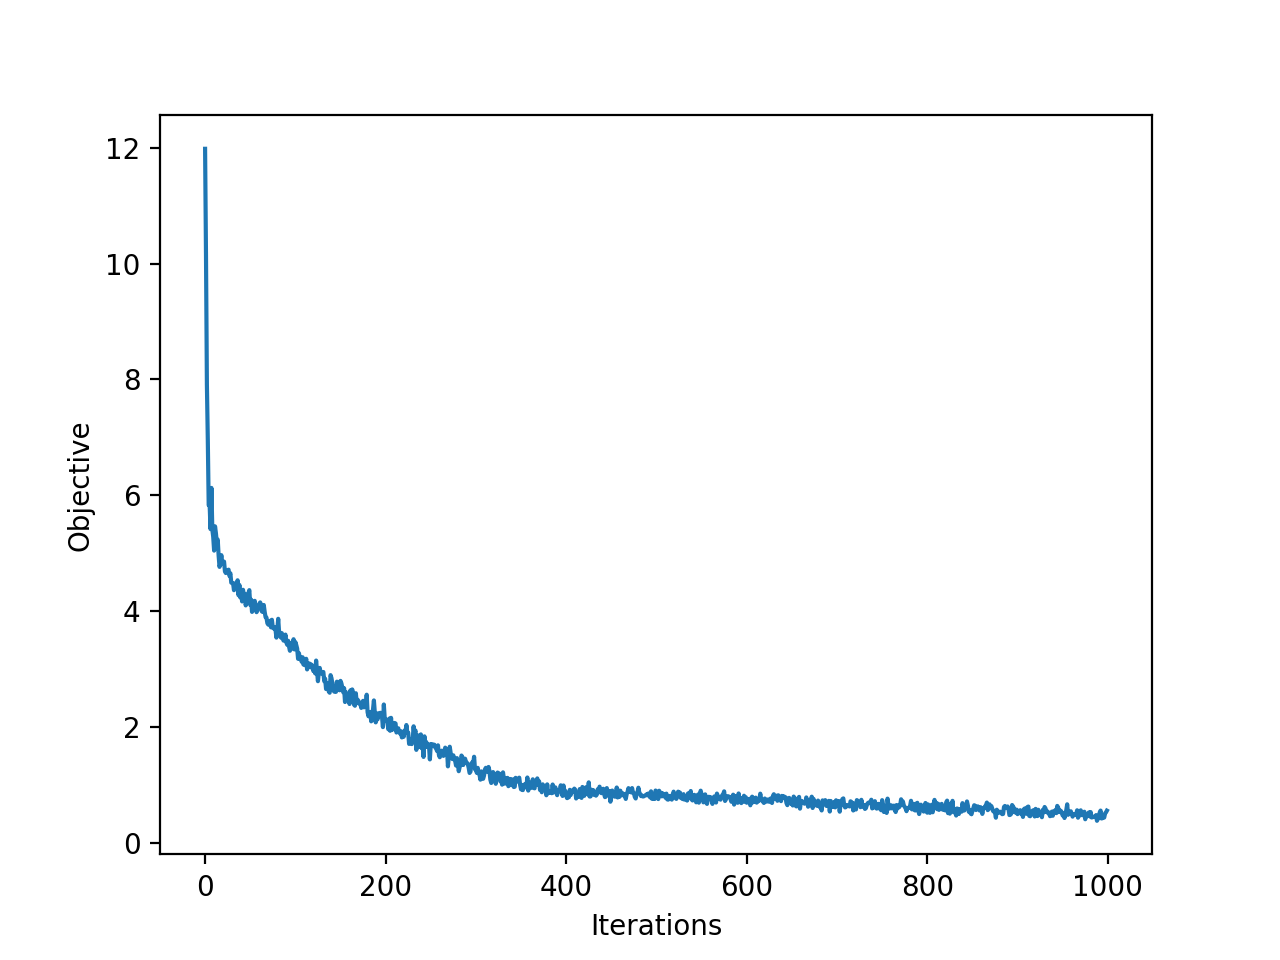

In [6]:
N_train = X_train.shape[0]
config_dict = {'M': 40, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':1000,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': []}

model, df, costs = aep_DGP_reg(X_train, y_train, X_test, y_test, 
				conf_dict= config_dict,
				return_cost=True)
fig0 = DGP_figures(model,conf_dict=config_dict).plot_cost(costs)

In [8]:
config_dict['optimizer'] = 'adam'
model, df = cont_optimization(model, X_test, y_test, conf_dict=config_dict,
                              new_max_it=1000, return_cost=False)

iter 0 	 obj 0.156
iter 50 	 obj 0.136
iter 100 	 obj 0.092
iter 150 	 obj 0.200
iter 200 	 obj 0.082
iter 250 	 obj 0.097
iter 300 	 obj 0.175
iter 350 	 obj 0.081
iter 400 	 obj 0.326
iter 450 	 obj 0.057
iter 500 	 obj 0.089
iter 550 	 obj 0.132
iter 600 	 obj 0.084
iter 650 	 obj 0.048
iter 700 	 obj 0.110
iter 750 	 obj 0.229
iter 800 	 obj 0.089
iter 850 	 obj 0.115
iter 900 	 obj 0.005
iter 950 	 obj 0.034
Test MSE= 0.053, NLL= -0.485, SN= 0.121


In [9]:
print dir(DGP_figures)

['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'h_out', 'h_out2', 'in_h', 'in_out', 'plot', 'plot_cost', 'plot_h_out', 'plot_hidden', 'plot_in_h', 'plot_init', 'plot_sample']


### Fitting plots

<IPython.core.display.Javascript object>


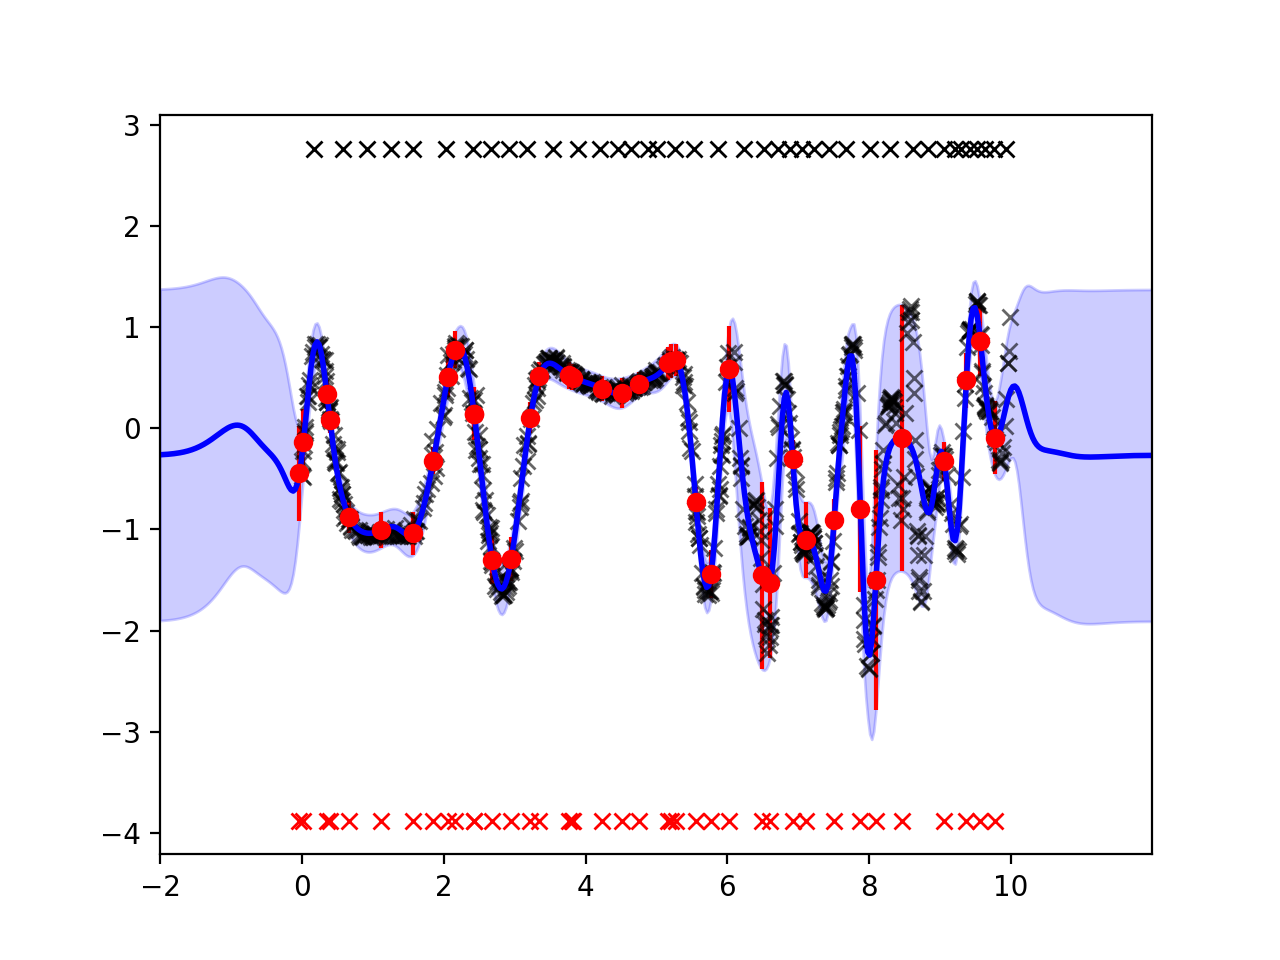

<IPython.core.display.Javascript object>


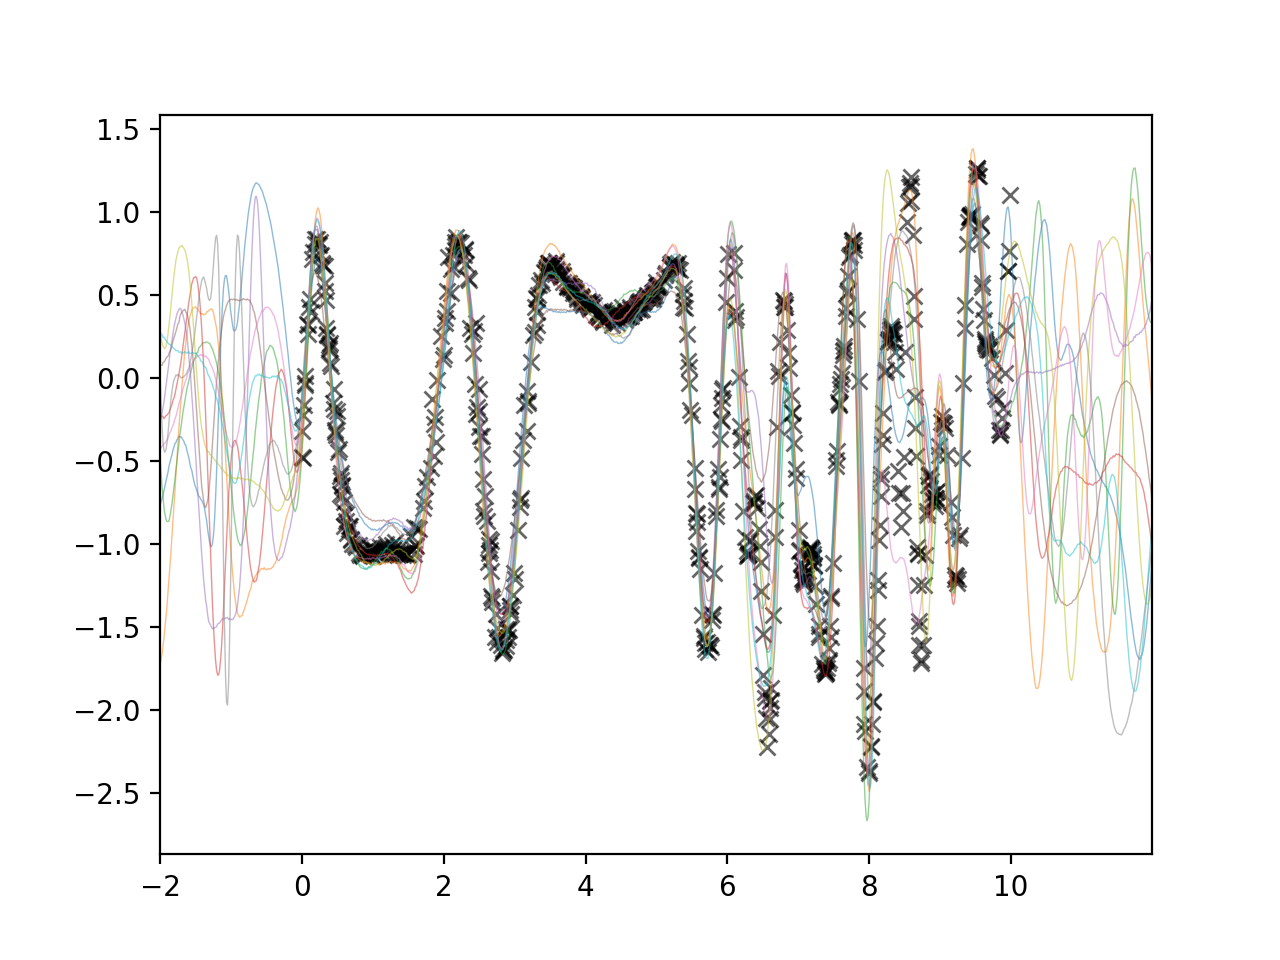

In [10]:
fig1 = DGP_figures(model, config_dict).plot()
fig2 = DGP_figures(model, config_dict).plot_sample()

### Hidden Layer

<IPython.core.display.Javascript object>


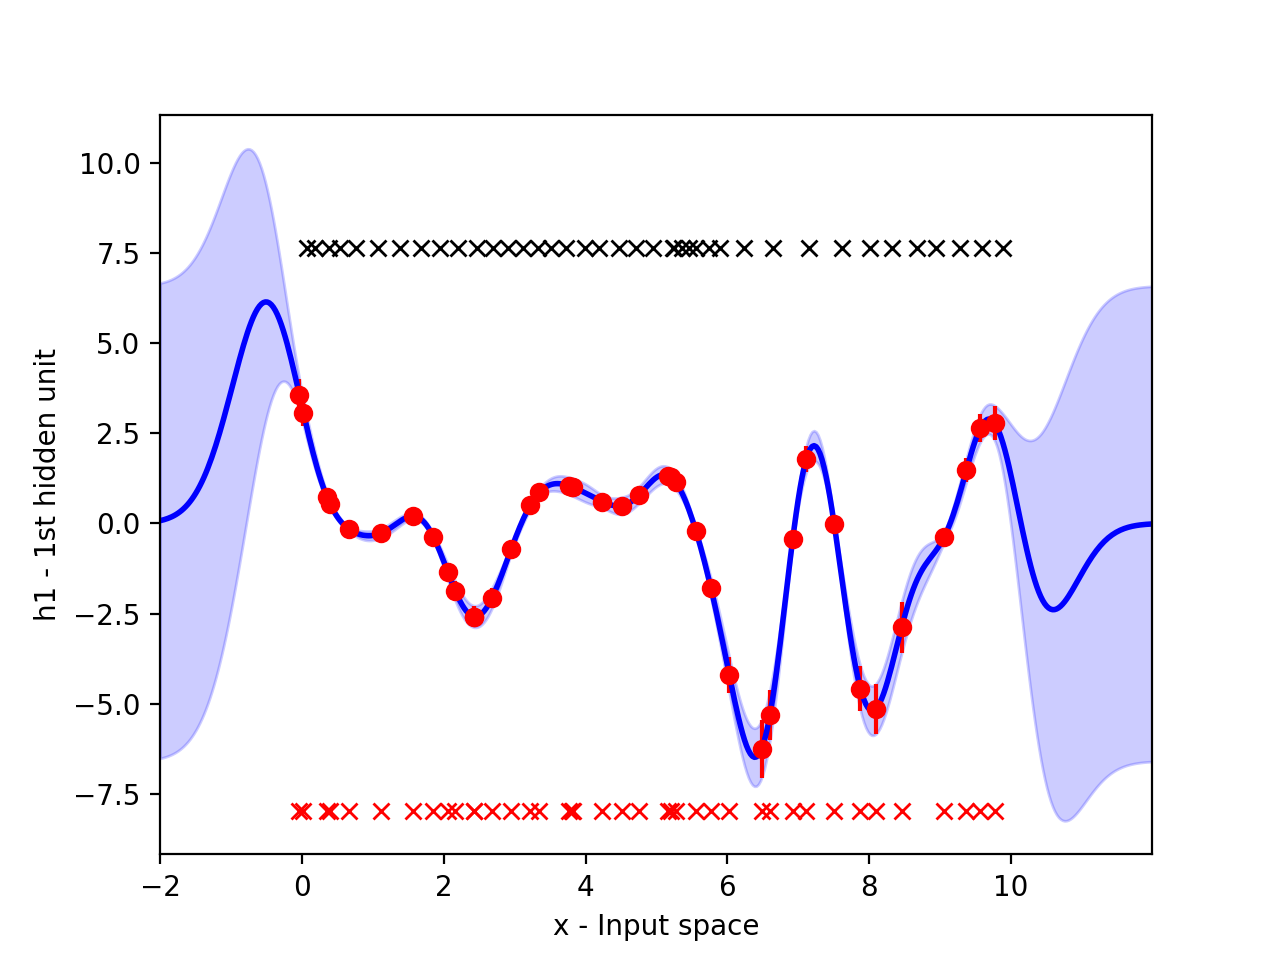

<IPython.core.display.Javascript object>


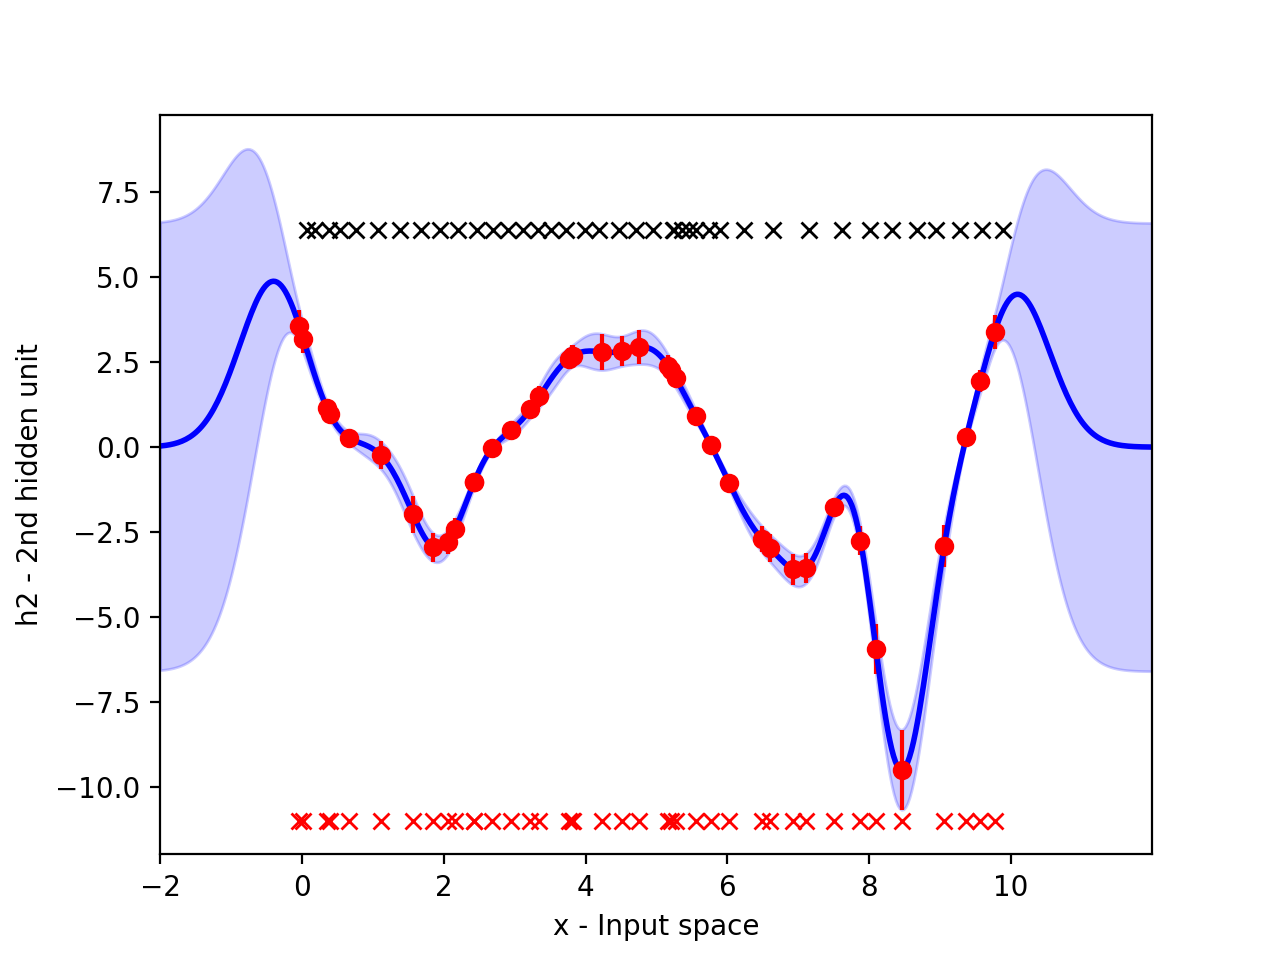

In [11]:
fig3 = DGP_figures(model, conf_dict=config_dict).plot_in_h()

<IPython.core.display.Javascript object>


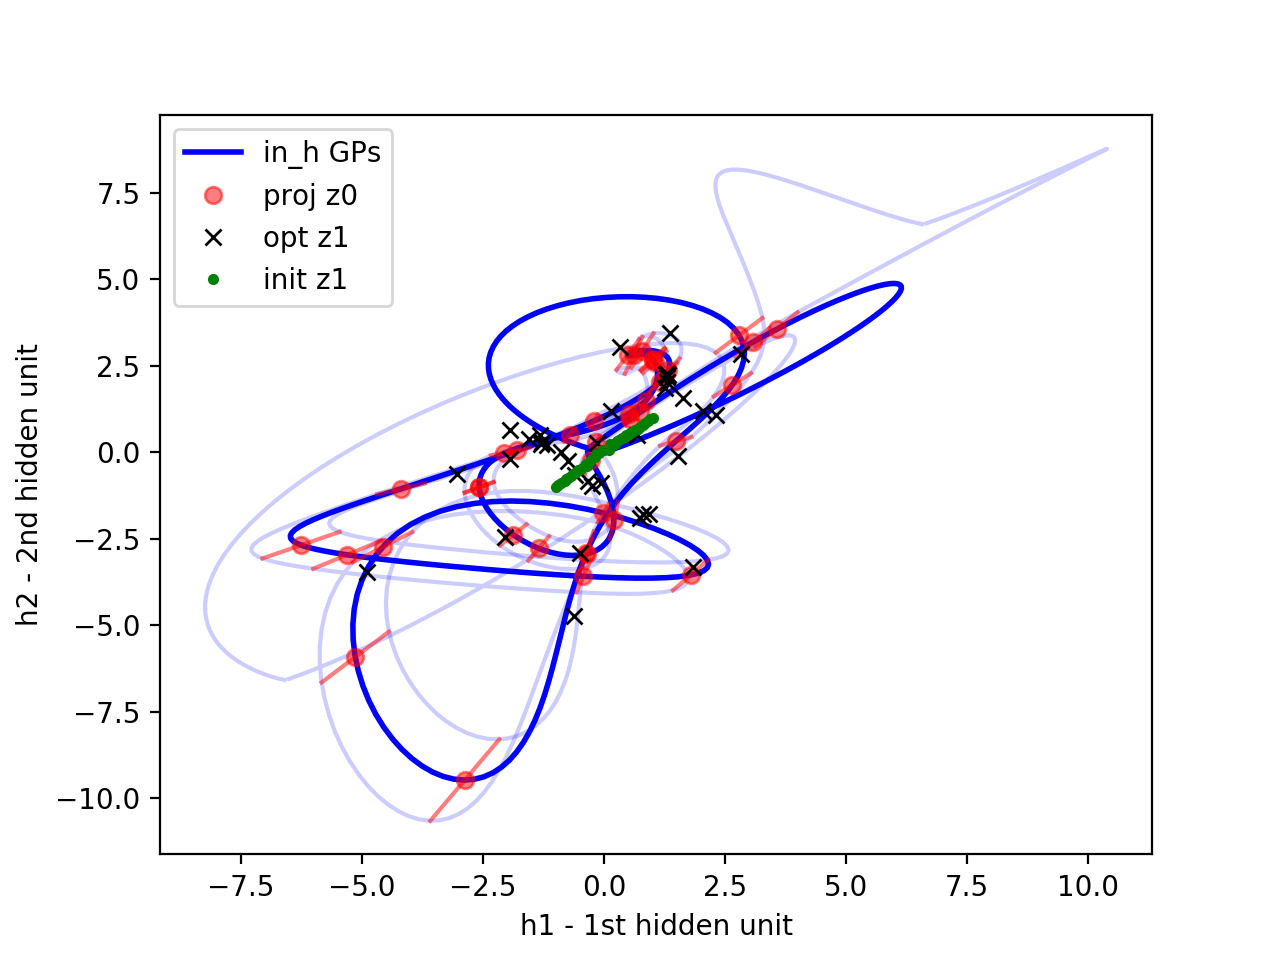

In [12]:
fig4 = DGP_figures(model, conf_dict=config_dict).plot_hidden()

<IPython.core.display.Javascript object>


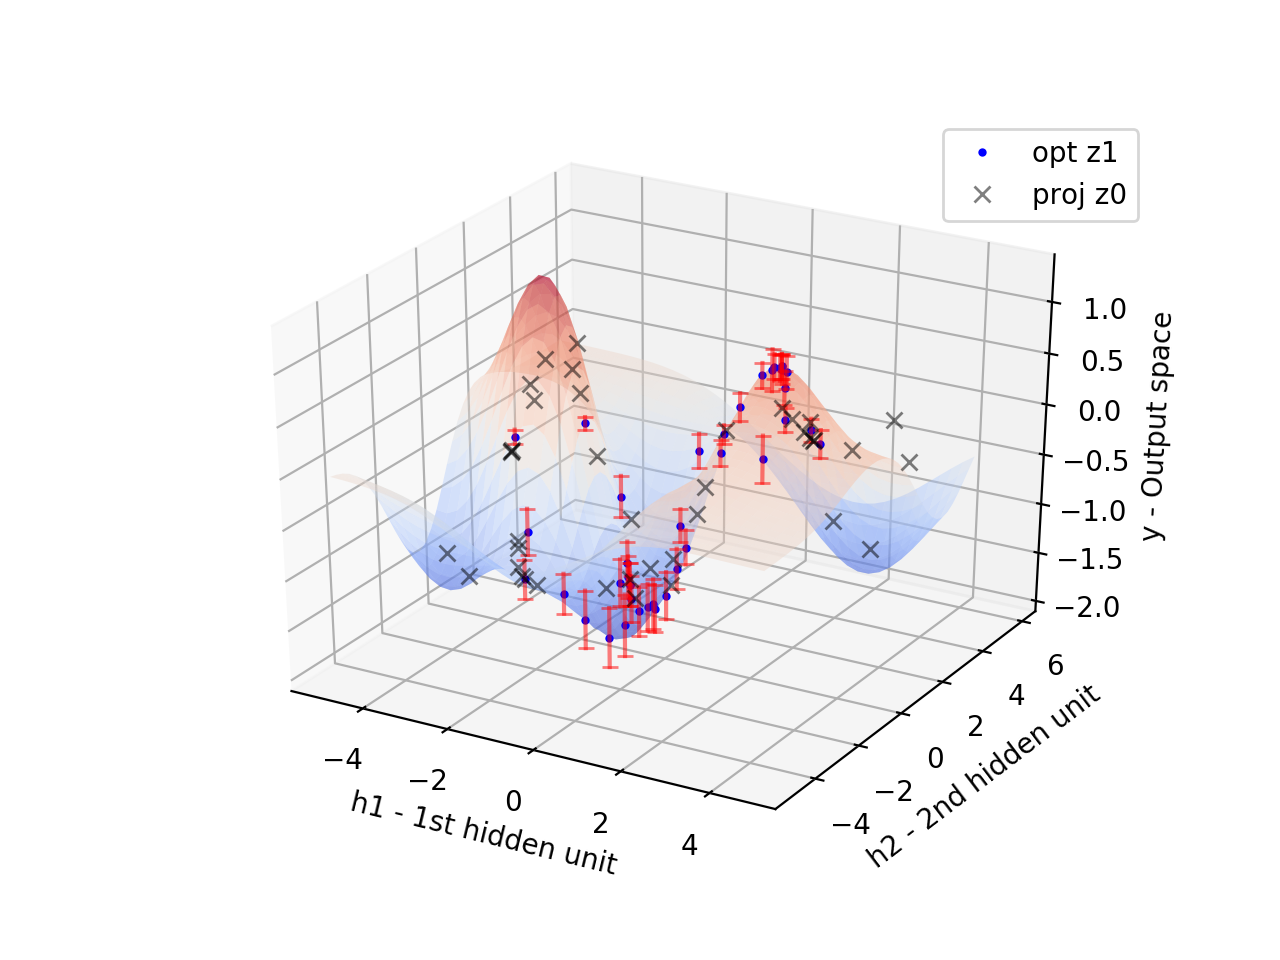

In [54]:
fig5 = DGP_figures(model, conf_dict=config_dict).plot_h_out()

### Initialisations

<IPython.core.display.Javascript object>


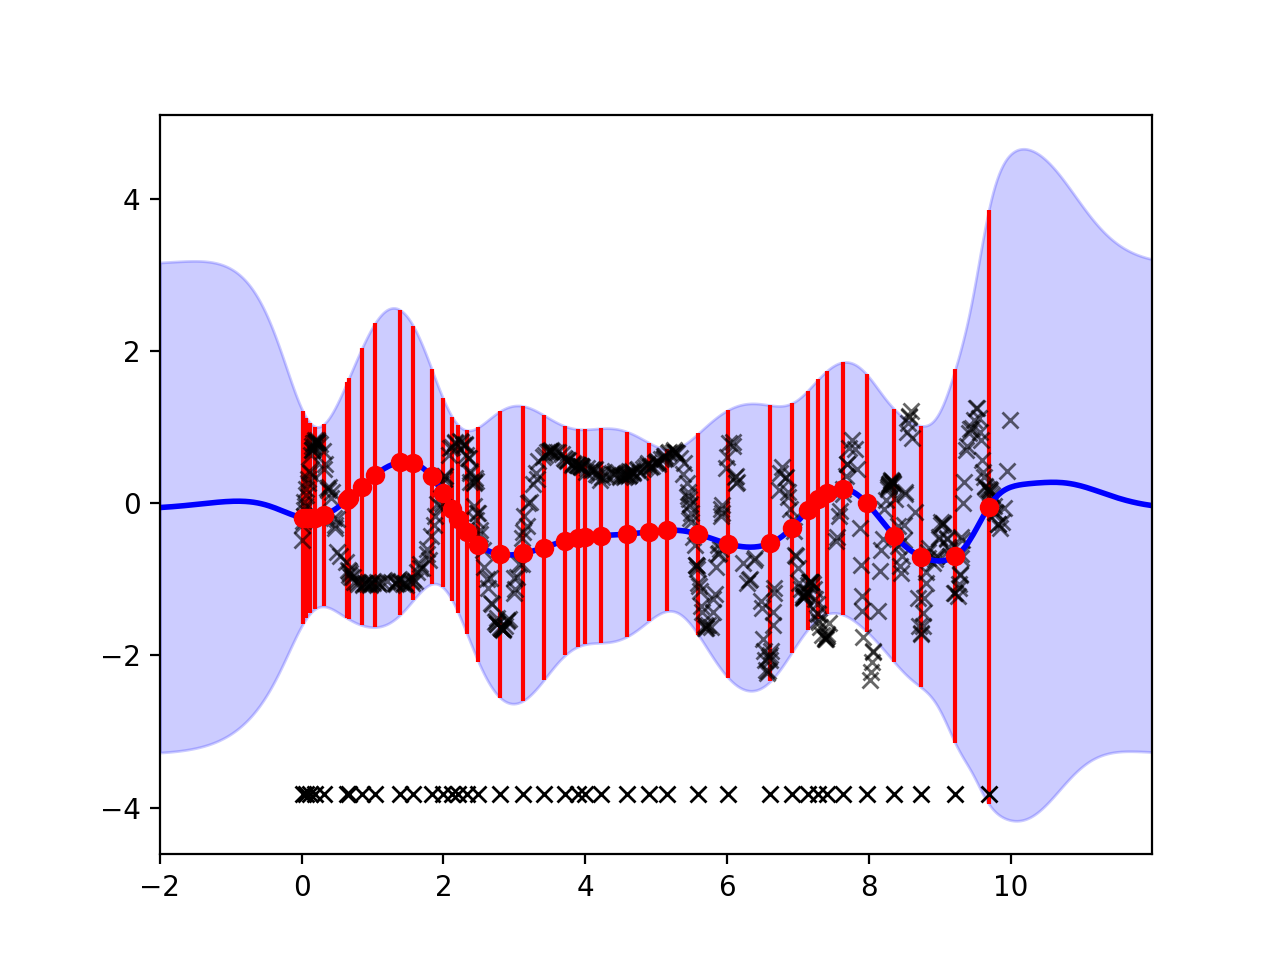

In [55]:
fig6 = DGP_figures(model, conf_dict=config_dict).plot_init()